# SONAR - Rock & Mine Detection

## DataSet Information

The Dataset contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.Dataset contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading Dataset
df=pd.read_csv('/kaggle/input/mines-vs-rocks/sonar.all-data.csv',header=None)

In [3]:
# Creating a list of headers names and adding those names as columns name
def adding_header(df):
    header = []

    for i in range(df.shape[1]-1):
        header.append(f"feature{i+1}")
        
    header.append('Output')
    df.columns=header
    return df
df=adding_header(df)

In [4]:
# Displaying first 5 rows of dataset
df.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,Output
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# Shape of Dataset
df.shape

(208, 61)

In [6]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   208 non-null    float64
 1   feature2   208 non-null    float64
 2   feature3   208 non-null    float64
 3   feature4   208 non-null    float64
 4   feature5   208 non-null    float64
 5   feature6   208 non-null    float64
 6   feature7   208 non-null    float64
 7   feature8   208 non-null    float64
 8   feature9   208 non-null    float64
 9   feature10  208 non-null    float64
 10  feature11  208 non-null    float64
 11  feature12  208 non-null    float64
 12  feature13  208 non-null    float64
 13  feature14  208 non-null    float64
 14  feature15  208 non-null    float64
 15  feature16  208 non-null    float64
 16  feature17  208 non-null    float64
 17  feature18  208 non-null    float64
 18  feature19  208 non-null    float64
 19  feature20  208 non-null    float64
 20  feature21 

`Note -` There are no Null values Present in the dataset

In [7]:
# Descriptive Statistics Of Dataset
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


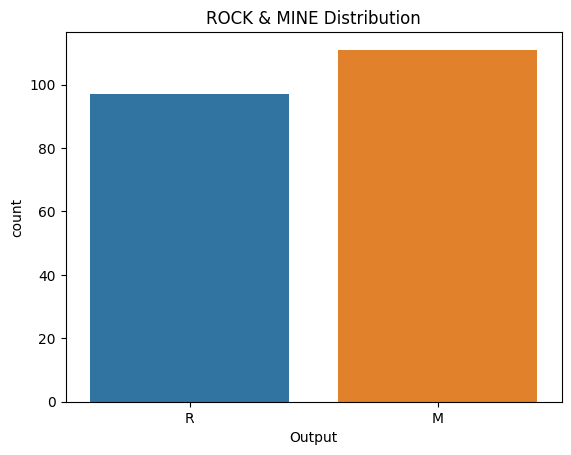

In [8]:
# Output Column Distribution
sns.countplot(data=df,x='Output')
plt.title("ROCK & MINE Distribution")
plt.show()

`Note-`Data is Nearly Balanced

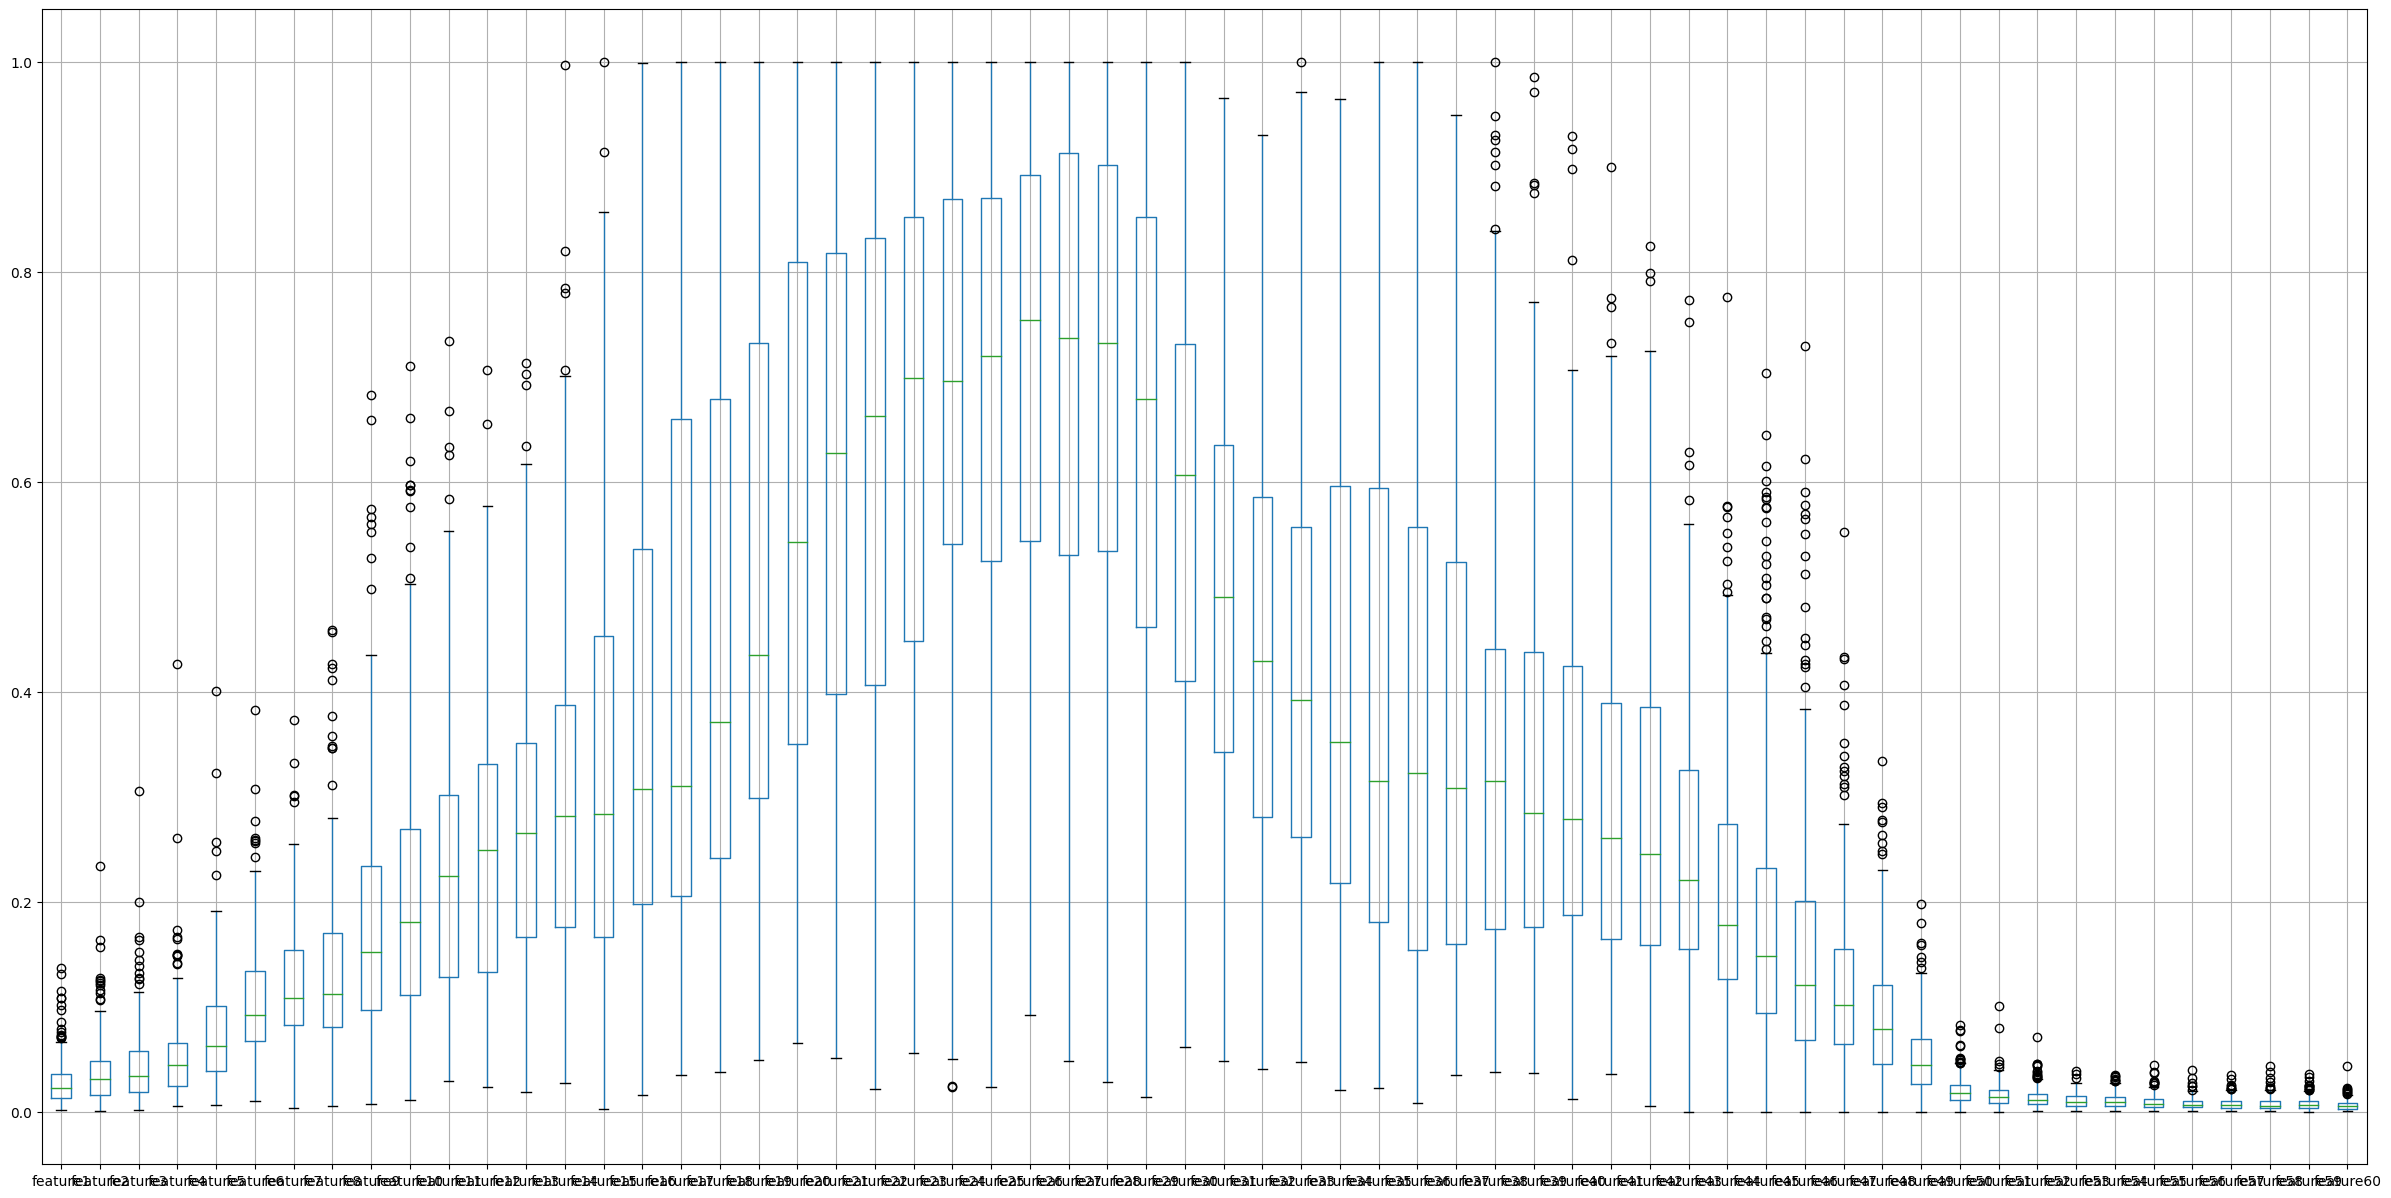

In [9]:
# Creating Boxplot
plt.figure(figsize=(30,15))
df[:-1].boxplot()
plt.show()

In [10]:
# Correlation
df.drop('Output',axis=1).corr()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60
feature1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
feature2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
feature3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
feature4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
feature5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
feature6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
feature7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
feature8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
feature9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
feature10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


## Data Preprocessing

In [11]:
# Spliting the dataset into Features and Output
X=df.drop(labels=['Output'],axis=1)
y=df['Output']

In [12]:
# Split dataset into train and test subsets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
print(f"Shape of X_train - {X_train.shape}")
print(f"Shape of y_train - {y_train.shape}")
print(f"Shape of X_test- {X_test.shape}")
print(f"Shape of y_test - {y_test.shape}")

Shape of X_train - (166, 60)
Shape of y_train - (166,)
Shape of X_test- (42, 60)
Shape of y_test - (42,)


## Model Training

In [14]:
models={
    "Logistics Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier()
}

for name,model in models.items():
    clf=model
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    acc=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {name} - {acc}")

Accuracy of Logistics Regression - 0.7857142857142857
Accuracy of Support Vector Classifier - 0.8333333333333334
Accuracy of Decision Tree Classifier - 0.6666666666666666
Accuracy of Random Forest Classifier - 0.8095238095238095


`Note -` Here we can see that Support Vector Classifier & Random Forest Classifier Performed Best then Logistics Regression and Decision Tree

## Hyperparameter Tuning 

### Support Vector Classifer

In [15]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
SVC_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)  
SVC_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.515 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
print("Best Parameters -",SVC_grid.best_estimator_)

Best Parameters - SVC(C=10, gamma=1)


In [17]:
y_pred=SVC_grid.predict(X_test)
print(f"Accuracy Score of SVC after Hyperparameter Tuning- {accuracy_score(y_test,y_pred)}")

Accuracy Score of SVC after Hyperparameter Tuning- 0.9285714285714286


### Random Forest Classifier

In [18]:
# Radom Forest Classifier
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

RFC_grid= GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
RFC_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100]})

In [19]:
print("Best Parameters -",RFC_grid.best_estimator_)

Best Parameters - RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=50)


In [20]:
y_pred=RFC_grid.predict(X_test)
print(f"Accuracy Score of Random Forest Classifier after Hyperparameter Tuning- {accuracy_score(y_test,y_pred)}")

Accuracy Score of Random Forest Classifier after Hyperparameter Tuning- 0.8095238095238095


## Conclusion-

**Support Vector Classifier has performed best after hyperparameter tuning and giving the accuracy of 92.85%**